In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset='/content/drive/MyDrive/ML/SUV_Purchase.csv'
import pandas as pd
df=pd.read_csv(dataset)

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

#Separating features and traget
X= df.drop(['User ID', 'Purchased'], axis=1)
Y = df['Purchased']

print(X)
print(Y)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [17]:
#splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred=knn_clf.predict(X_test)

In [33]:
knn_clf.score(sc.transform(X),Y)#do it again doing scaling for X

0.925

In [10]:
import numpy as np
#for best k values
neighbors=np.arange(1,20)#array and initialize it with 1,20
overall_accuracy=np.empty(len(neighbors))
training_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn_clf=KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train,Y_train)

  training_accuracy[i]=knn_clf.score(X_train,Y_train)

  test_accuracy[i]=knn_clf.score(X_test,Y_test)


  #overall accuracy
  overall_accuracy[i]=knn_clf.score(sc.transform(X),Y)

#Generate the graphs


In [11]:
overall_accuracy

array([0.9575, 0.915 , 0.9225, 0.9125, 0.92  , 0.915 , 0.9175, 0.915 ,
       0.91  , 0.9125, 0.9125, 0.9125, 0.9075, 0.9075, 0.9075, 0.9075,
       0.91  , 0.905 , 0.9075])

In [12]:
training_accuracy

array([0.996875, 0.940625, 0.934375, 0.928125, 0.93125 , 0.921875,
       0.925   , 0.921875, 0.91875 , 0.915625, 0.915625, 0.915625,
       0.909375, 0.909375, 0.909375, 0.909375, 0.9125  , 0.90625 ,
       0.909375])

In [13]:
test_accuracy

array([0.8   , 0.8125, 0.875 , 0.85  , 0.875 , 0.8875, 0.8875, 0.8875,
       0.875 , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   ,
       0.9   , 0.9   , 0.9   ])

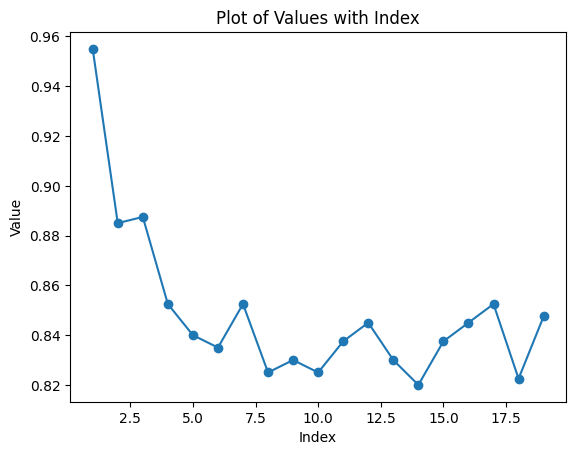

In [14]:

import numpy as np
import matplotlib.pyplot as plt

values = np.array([0.955 , 0.885 , 0.8875, 0.8525, 0.84  , 0.835 , 0.8525, 0.825 ,
       0.83  , 0.825 , 0.8375, 0.845 , 0.83  , 0.82  , 0.8375, 0.845 ,
       0.8525, 0.8225, 0.8475])

# Generate the index values starting from 1
indices = np.arange(1, len(values) + 1)

# Plot the values
plt.plot(indices, values, marker='o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Values with Index')
plt.show()


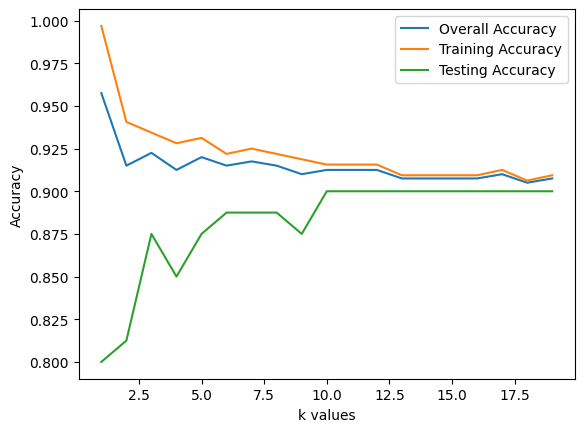

In [15]:
import matplotlib.pyplot as plt
plt.plot(neighbors,overall_accuracy,label="Overall Accuracy")
plt.plot(neighbors,training_accuracy,label="Training Accuracy")
plt.plot(neighbors,test_accuracy,label="Testing Accuracy")
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()